128


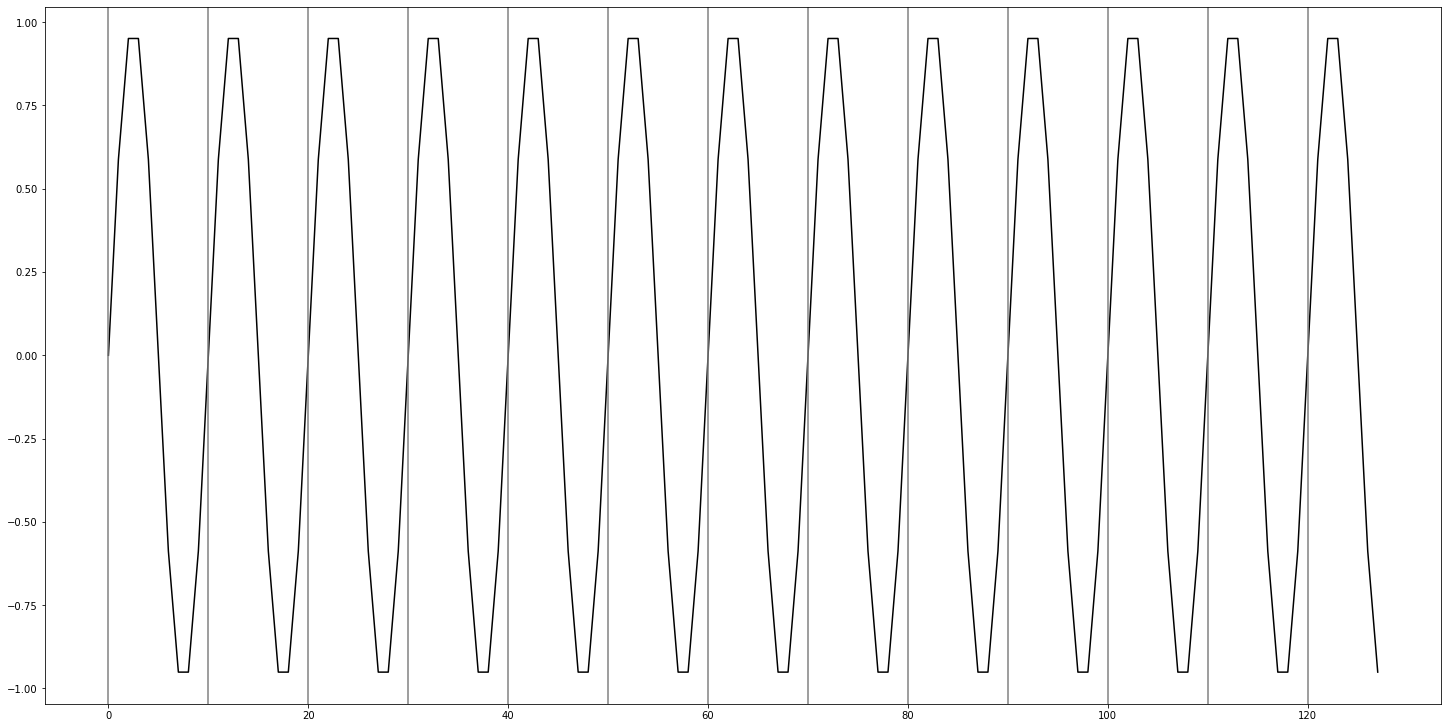

In [1]:
import numpy as np
from matplotlib import colors, ticker
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.fft import dct

np.random.seed(256)  # for reproducibility

# create time steps and corresponding sine wave with Gaussian noise
fs = 10  # sampling rate, Hz
ts = np.arange(0, 12.8, 1.0 / fs)  # time vector - 8 seconds

ys = np.sin(2*np.pi * 1.0 * ts)  # signal @ 1.0 Hz, without noise
yerr = 0. * np.random.normal(size=len(ts))  # Gaussian noise
yraw = ys + yerr

nx = len(yraw)
print(nx)

fig, ax = plt.subplots(1,1, constrained_layout=True,figsize=(20,10))
ax.plot(yraw, color='k', linestyle='-')
for w in np.arange(0, nx-1, 10):
    ax.axvline(x = w, color = 'grey', label = 'axvline - full height')


In [2]:
print('YRAW mean:      ',yraw.mean())

print('YRAW variance:  ',yraw.var())

YRAW mean:       0.012022201317090824
YRAW variance:   0.4979023416754914


In [3]:
import scipy 

def dct_with_fft(x):
    N = x.size
    v = np.empty_like(x)
    v[:(N-1)//2+1] = x[::2]

    if N % 2: # odd length
        v[(N-1)//2+1:] = x[-2::-2]
    else: # even length
        v[(N-1)//2+1:] = x[::-2]

    V = scipy.fftpack.fft(v)

    k = np.arange(N)
    V *= 2 * np.exp(-1j*np.pi*k/(2*N))
    return V.real


DCT variance sum:  0.498047  True Variance: 0.497902 

DFT variance sum:  0.498047  True Variance: 0.497902 

kbins  [ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5 27.5
 28.5 29.5 30.5 31.5 32.5 33.5 34.5 35.5 36.5 37.5 38.5 39.5 40.5 41.5
 42.5 43.5 44.5 45.5 46.5 47.5 48.5 49.5 50.5 51.5 52.5 53.5 54.5 55.5
 56.5 57.5 58.5 59.5 60.5 61.5 62.5 63.5 64.5]
dk_bins  [  2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.  28.
  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.  56.
  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.  84.
  86.  88.  90.  92.  94.  96.  98. 100. 102. 104. 106. 108. 110. 112.
 114. 116. 118. 120. 122. 124. 126. 128.]
kbin: 0.500000     dk_bin: 1.000000    PSbin: 0.009390     0.009390
kbin: 1.500000     dk_bin: 1.000000    PSbin: 0.009829     0.009829
kbin: 2.500000     dk_bin: 1.000000    PSbin: 0.010620     0.010620
kbin: 3.50000

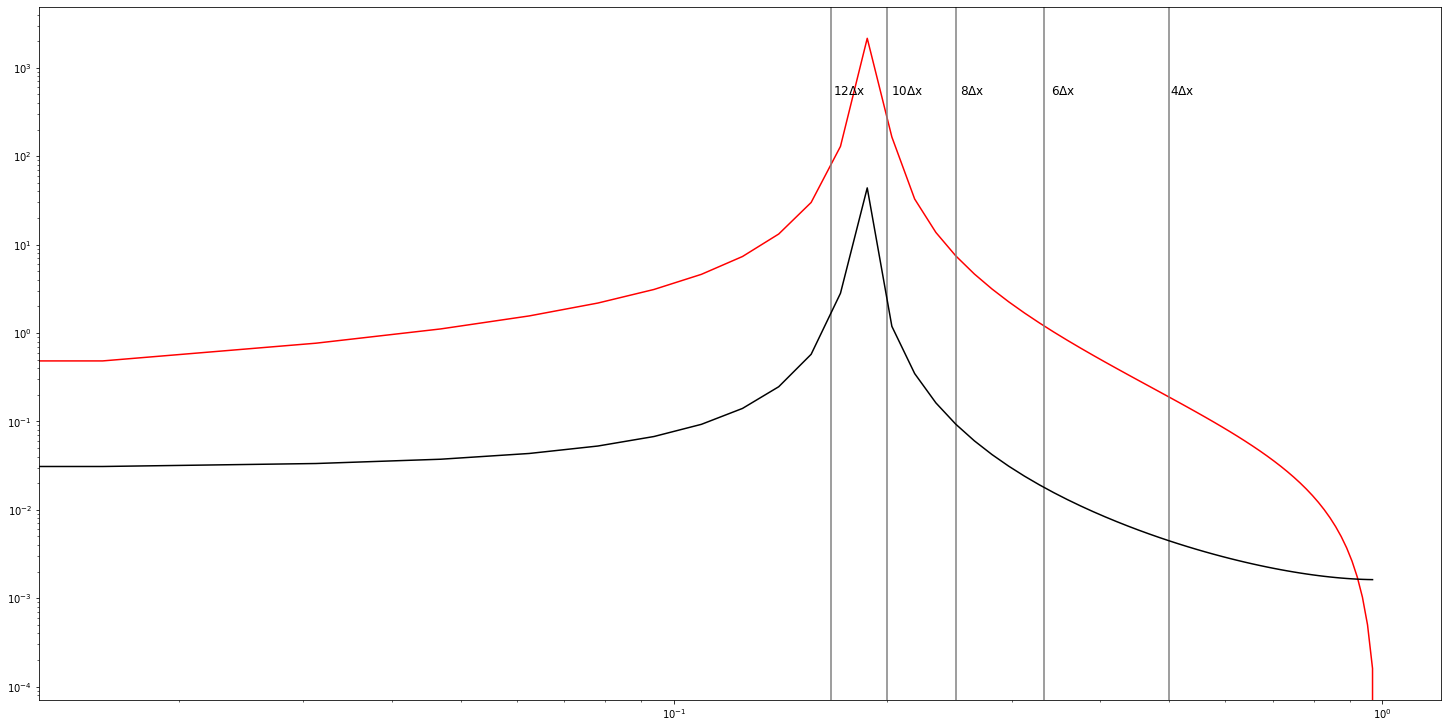

In [24]:
uh = dct(yraw, norm='ortho', type=2)

#uh = np.sqrt(1.0/nx) * dct_with_fft(yraw)

kbins = np.arange(0.5, nx//2+1, 1.)
kvals = 0.5 * (kbins[1:] + kbins[:-1])

variance2 = 0.5*(uh**2)

variance3 = np.zeros((nx//2,))

for n in np.arange(1,nx//2):
    
    variance3[n-1] = variance2[2*n-1] + variance2[2*n]
    
# print(variance4[0:10], variance3[0:10])

# print(variance3.shape, wbins.shape)

print('DCT variance sum:  %f  True Variance: %f \n' % (2*variance.sum()/float(nx), yraw.var()))

PSbins, _, _ = stats.binned_statistic(kvals, variance3, statistic = "mean", bins = kbins)
PSbins *= np.pi * (kbins[1:]**2 - kbins[:-1]**2)

wavenumber = 2*(kvals-1)/nx

fig, ax = plt.subplots(1,1, constrained_layout=True,figsize=(20,10))

ax.loglog(wavenumber, PSbins, color='r', linestyle='-')

ylabel = 5. * 100.

xoffset = [0.001, 0.0075, 0.0035, 0.0025, 0.001]

for n, w in enumerate([4.0, 6.0, 8.0, 10., 12.]):
    ax.axvline(x = 2.0/w, color = 'grey', label = 'axvline - full height')  
    ax.annotate(r"%d$\Delta$x" % w, xy=(2./w + xoffset[n], ylabel), xycoords='data', color='k',fontsize=12)
    

uh = np.fft.fftn(yraw, norm='ortho')

variance = 0.5*(uh*np.conj(uh)).real

print('DFT variance sum:  %f  True Variance: %f \n' % (2*variance.sum()/float(nx), yraw.var()))
                                         
kfreq   = (np.fft.fftfreq(nx) * nx)
kbins = np.arange(0.5, nx//2+1, 1.)
dk_bins = kbins[1:] - kbins[:-1]

print('kbins ',kbins)

print('dk_bins ',kbins[1:]**2 - kbins[:-1]**2)

PSbins, _, _ = stats.binned_statistic(kfreq, variance, statistic = "mean", bins = kbins)

for n in np.arange(len(kbins)-1):
    print('kbin: %f     dk_bin: %f    PSbin: %f     %f' % (kbins[n], dk_bins[n], PSbins[n], PSbins[n]*dk_bins[n]))

PSbins *= np.pi * (kbins[1:] - kbins[:-1])

ax.loglog(wavenumber, PSbins, color='k', linestyle='-')


